In [28]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime
import numpy as np
import statistics as sts
import math

#read the data
total_cases = pd.read_csv('https://covid.ourworldindata.org/data/total_cases.csv')
total_deaths = pd.read_csv('https://covid.ourworldindata.org/data/total_deaths.csv')
daily_cases = pd.read_csv('https://covid.ourworldindata.org/data/new_cases.csv')
daily_deaths = pd.read_csv('https://covid.ourworldindata.org/data/new_deaths.csv')
full_set = pd.read_csv('https://covid.ourworldindata.org/data/full_data.csv')
amount_of_tests = pd.read_csv('covid-19-tests-country.csv')
tests_per_million = pd.read_csv('covid19-tests-per-million-people.csv')

full_set = full_set.fillna(0)
full_set['date'] = pd.to_datetime(full_set['date'])

#make list of all locations in the data
all_locations = list(set(full_set['location']))
full_set['est_total_cases'] = full_set['total_deaths'] * 100
full_set.sort_values('date').head()

date     location  new_cases  new_deaths  total_cases  \
1994 2020-01-21  South Korea        0.0         0.0            1   
1318 2020-01-21        Japan        0.0         0.0            1   
2489 2020-01-21     Thailand        0.0         0.0            2   
498  2020-01-21        China        0.0         0.0          278   
2810 2020-01-21        World        0.0         0.0          282   

      total_deaths  est_total_cases  
1994           0.0              0.0  
1318           0.0              0.0  
2489           0.0              0.0  
498            6.0            600.0  
2810           6.0            600.0

In [30]:
full_set.loc[full_set['location'] == 'Netherlands']

date     location  new_cases  new_deaths  total_cases  \
1716 2020-02-28  Netherlands        0.0         0.0            1   
1717 2020-02-29  Netherlands        1.0         0.0            2   
1718 2020-03-01  Netherlands        5.0         0.0            7   
1719 2020-03-02  Netherlands        6.0         0.0           13   
1720 2020-03-03  Netherlands        5.0         0.0           18   
1721 2020-03-04  Netherlands       10.0         0.0           28   
1722 2020-03-05  Netherlands       10.0         0.0           38   
1723 2020-03-06  Netherlands       44.0         0.0           82   
1724 2020-03-07  Netherlands       46.0         0.0          128   
1725 2020-03-08  Netherlands       60.0         0.0          188   
1726 2020-03-09  Netherlands       77.0         2.0          265   
1727 2020-03-10  Netherlands       56.0         0.0          321   
1728 2020-03-11  Netherlands       61.0         1.0          382   
1729 2020-03-12  Netherlands      121.0         1.0          503   
1730 2020-03-13  Netherlands      111.0         0.0          614   
1731 2020-03-14  Netherlands      190.0         5.0          804   
1732 2020-03-15  Netherlands      155.0         2.0          959   
1733 2020-03-16  Netherlands      176.0         8.0         1135   
1734 2020-03-17  Netherlands      278.0         4.0         1413   

      total_deaths  est_total_cases  
1716           0.0              0.0  
1717           0.0              0.0  
1718           0.0              0.0  
1719           0.0              0.0  
1720           0.0              0.0  
1721           0.0              0.0  
1722           0.0              0.0  
1723           0.0              0.0  
1724           1.0            100.0  
1725           1.0            100.0  
1726           3.0            300.0  
1727           3.0            300.0  
1728           4.0            400.0  
1729           5.0            500.0  
1730           5.0            500.0  
1731          10.0           1000.0  
1732          12.0           1200.0  
1733          20.0           2000.0  
1734          24.0           2400.0

In [29]:
# get all dates since start of incident from anouther datasource
start = datetime.date(2020, 1, 22)     #first known cases on 22-01-2020
today_date = datetime.date.today()
numdays = (today_date - start).days
all_dates = sorted([(today_date - datetime.timedelta(days=x)) for x in range(numdays+1)])
all_dates = [item.__format__('%m-%d-%Y') for item in all_dates]


#read the data

url_base = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'

date_dict = {}
for date in all_dates[:-1]:
    date_dict[date] = {}
    url = url_base + date + '.csv'
    df = pd.read_csv(url)
    df = df.fillna(0)
    available_countries = set(df['Country/Region'])
    for item in available_countries:
        date_dict[date][item] = {'infected': sum((df.loc[df['Country/Region'] == item]['Confirmed']).values),
                            'deaths': sum((df.loc[df['Country/Region'] == item]['Deaths']).values),
                            'recovered': sum((df.loc[df['Country/Region'] == item]['Recovered']).values),
                           }
df.head()

Province/State Country/Region          Last Update  Confirmed  Deaths  \
0          Hubei          China  2020-03-19T10:13:14      67800    3130   
1              0          Italy  2020-03-19T17:43:03      41035    3405   
2              0           Iran  2020-03-19T11:33:29      18407    1284   
3              0          Spain  2020-03-19T20:13:08      17963     830   
4              0        Germany  2020-03-19T20:13:08      15320      44   

   Recovered  Latitude  Longitude  
0      57682   30.9756   112.2707  
1       4440   41.8719    12.5674  
2       5710   32.4279    53.6880  
3       1107   40.4637    -3.7492  
4        113   51.1657    10.4515

In [31]:
# Return a dataFrame for a given country
country = 'Netherlands'
pre_df = []
for date in all_dates:
    try:
        pre_df.append([date, country, 
                       date_dict[date][country]['infected'], 
                        date_dict[date][country]['deaths'], 
                         date_dict[date][country]['recovered']])
    except:
        pass
country_df = pd.DataFrame(pre_df, columns=['date','country', 'infected', 'deaths', 'recovered'])
country_df['delta_recover'] = [0]+[country_df['recovered'][x+1] - country_df['recovered'][x] for x in range(len(country_df['recovered'])-1)]
country_df

date      country  infected  deaths  recovered  delta_recover
0   02-27-2020  Netherlands         1       0          0              0
1   02-28-2020  Netherlands         1       0          0              0
2   02-29-2020  Netherlands         6       0          0              0
3   03-01-2020  Netherlands        10       0          0              0
4   03-02-2020  Netherlands        18       0          0              0
5   03-03-2020  Netherlands        24       0          0              0
6   03-04-2020  Netherlands        38       0          0              0
7   03-05-2020  Netherlands        82       0          0              0
8   03-06-2020  Netherlands       128       1          0              0
9   03-07-2020  Netherlands       188       1          0              0
10  03-08-2020  Netherlands       265       3          0              0
11  03-09-2020  Netherlands       321       3          0              0
12  03-10-2020  Netherlands       382       4          0              0
13  03-11-2020  Netherlands       503       5          0              0
14  03-12-2020  Netherlands       503       5          0              0
15  03-13-2020  Netherlands       804      10          0              0
16  03-14-2020  Netherlands       959      12          2              2
17  03-15-2020  Netherlands      1135      20          2              0
18  03-16-2020  Netherlands      1414      24          2              0
19  03-17-2020  Netherlands      1708      43          2              0
20  03-18-2020  Netherlands      2056      58          2              0
21  03-19-2020  Netherlands      2465      77          2              0

In [4]:
### Functions used

## Function to add the growth_rate for a given city
def growt_rate(dataframe, city):
    '''Function to build dataframe for a given city, adding growth rate'''
    # Add a growth rate for a country
    df_GR = dataframe.loc[dataframe['location']== city]
    df_GR = df_GR.loc[df_GR['total_cases'] >= 5]
    df_GR = df_GR.reset_index()

    # calculate GR
    SK_GR =[0.0] + [(df_GR['new_cases'][i+1] /df_GR['new_cases'][i]) for i in range(len(df_GR)-1)]
    df_GR['GR'] = SK_GR

    #replace inf and NaN with 0
    df_GR = df_GR.replace([np.inf, -np.inf], np.nan)
    df_GR = df_GR.replace(np.NaN,0)
    return df_GR

def growt_rate2(dataframe, city):
    '''Function to build dataframe for a given city, adding growth rate'''
    # Add a growth rate for a country
    df_GR = dataframe.loc[dataframe['location']== city]
    df_GR = df_GR.loc[df_GR['total_cases'] >= 5]
    df_GR = df_GR.reset_index()

    # calculate GR
    #SK_GR =[0.0] + [(df_GR['new_cases'][i+1] /df_GR['new_cases'][i]) for i in range(len(df_GR)-1)]
    df_GR['GR'] = df_GR['new_cases'] / df_GR['total_cases']

    #replace inf and NaN with 0
    df_GR = df_GR.replace([np.inf, -np.inf], np.nan)
    df_GR = df_GR.replace(np.NaN,0)
    return df_GR

#test function
#df_growthrate = growt_rate(full_set, 'Netherlands' )
#df_growthrate.head()

## Function to plot total cases
def plot_total_cases(country_list, title, height = 15):
    """Function to plot the given countries total cases over time, takes an list of countries as input"""
    plt.figure(figsize=(20,height))
    for item in country_list:
        x = full_set.loc[full_set['location']== item]['date']
        y = full_set.loc[full_set['location']== item]['total_cases']
        y1 = full_set.loc[full_set['location']== item]['est_total_cases']
        plt.plot(x,y, label='reported cases: {}'.format(item))
        plt.plot(x,y1, label='estimated cases: {}'.format(item))

    plt.ylabel("Amount of infections")
    plt.xlabel('Date range')
    plt.title(title)
    plt.xticks(rotation = 90)
    plt.legend()
    plt.show()
    
#test_list = ['Netherlands', 'Italy']
#plot_total_cases(test_list, 'total cases for italy vs nl')

## Function to plot new cases
def plot_new_cases(country_list, title, start = 0, height=10, width=20):
    """Function to plot the given countries total cases over time, takes an list of countries as input"""
    plt.figure(figsize=(width,height))
    for item in country_list:
        x = full_set.loc[full_set['location']== item]['date'][start:]
        y = full_set.loc[full_set['location']== item]['new_cases'][start:]
        plt.plot(x,y, label=item)

    plt.ylabel("Amount of new cases")
    plt.xlabel('Date range')
    plt.title(title)
    plt.xticks(rotation = 90)
    plt.legend()
    plt.show()

#Function to plot deaths per country
def plot_death_cases(country_list, title, start = 0, height=10, width=20):
    """Function to plot the given countries total cases over time, takes an list of countries as input"""
    plt.figure(figsize=(width,height))
    for item in country_list:
        x = full_set.loc[full_set['location']== item]['date'][start:]
        y = full_set.loc[full_set['location']== item]['total_deaths'][start:]
        plt.plot(x,y, label=item)

    plt.ylabel("Amount of deaths")
    plt.xlabel('Date range')
    plt.title(title)
    plt.xticks(rotation = 90)
    plt.legend()
    plt.show()

def death_rate(dataframe, city):
    '''Function to build dataframe for a given city, adding growth rate'''
    # Add a growth rate for a country
    df_dr = dataframe.loc[dataframe['location']== city]
    #df_dr = df_GR.loc[df_GR['total_cases'] >= 5]
    df_dr = df_dr.reset_index()

    # calculate DR
    deathrate = [(df_dr['total_deaths'][i] /df_dr['total_cases'][i]) for i in range(len(df_dr))]
    df_dr['DR'] = deathrate

    #replace inf and NaN with 0
    #df_GR = df_GR.replace([np.inf, -np.inf], np.nan)
    #df_GR = df_GR.replace(np.NaN,0)
    df_dr = df_dr.loc[df_dr['DR'] < 1]
    return df_dr

#test_list = ['Netherlands', 'Italy']
#plot_new_cases(test_list, 'new cases over time for NL and IT')
#death_rate(full_set, 'Netherlands').head()


# Return a dataFrame for a given country
def dataframe_from_dict(country):
    pre_df = []
    for date in all_dates:
        try:
            pre_df.append([date, country, 
                           date_dict[date][country]['infected'], 
                            date_dict[date][country]['deaths'], 
                             date_dict[date][country]['recovered']])
        except:
            pass
    country_df = pd.DataFrame(pre_df, columns=['date','country', 'infected', 'deaths', 'recovered'])
    country_df['delta_recover'] = [0]+[country_df['recovered'][x+1] - country_df['recovered'][x] for x in range(len(country_df['recovered'])-1)]
    return country_df

#test the function
dataframe_from_dict('').head()

date country infected deaths recovered  delta_recover
0  NaN     NaN      NaN    NaN       NaN              0

In [5]:
full_set

date     location  new_cases  new_deaths  total_cases  \
0    2020-02-25  Afghanistan        0.0         0.0            1   
1    2020-02-26  Afghanistan        0.0         0.0            1   
2    2020-02-27  Afghanistan        0.0         0.0            1   
3    2020-02-28  Afghanistan        0.0         0.0            1   
4    2020-02-29  Afghanistan        0.0         0.0            1   
...         ...          ...        ...         ...          ...   
2862 2020-03-13        World     7488.0       338.0       132758   
2863 2020-03-14        World     9761.0       433.0       142534   
2864 2020-03-15        World    10967.0       343.0       153517   
2865 2020-03-16        World    13971.0       855.0       167506   
2866 2020-03-17        World    11594.0       819.0       179112   

      total_deaths  est_total_cases  
0              0.0              0.0  
1              0.0              0.0  
2              0.0              0.0  
3              0.0              0.0  
4              0.0              0.0  
...            ...              ...  
2862        4956.0         495600.0  
2863        5392.0         539200.0  
2864        5735.0         573500.0  
2865        6606.0         660600.0  
2866        7426.0         742600.0  

[2867 rows x 7 columns]

# Calculate Growth Rate
The growth rate for countries with more then 50 cases is calculated. We start looking from a moment when there are more then 5 cases know in a country.

In [7]:
# Make a list with cities with more total_cases then threshold
threshold = 50
more_then = full_set.loc[full_set['date']== '2020-03-16']
more_then = more_then.loc[full_set['total_cases'] >= threshold]
more_then_c_list = list(more_then['location'])
more_then_c_list.remove('International')
more_then_c_list.remove('World')

#Calculate the growth_rates, build a model
growth_rates = []
for country in more_then_c_list:
    # Add a growth rate for a country
    
    
    growth_rates.append([country, growt_rate2(full_set, country)['GR'].mean()])
    
df = pd.DataFrame.from_records(growth_rates)
df = df.dropna()
df.to_csv('test.csv')   #write to csv for further processing of the visualization.
df = df.sort_values(1)

C:\Users\_Vinc\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':


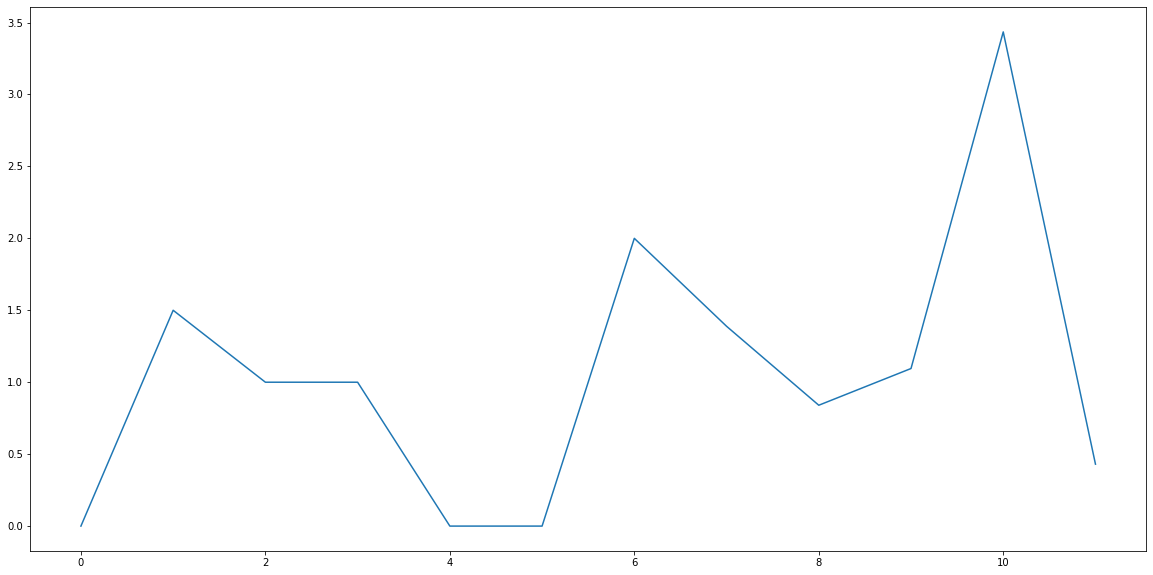

In [8]:
Growth_rate_plt = growt_rate(full_set, 'Brazil')['GR']
plt.figure(figsize=(20,10))
plt.plot(Growth_rate_plt)
plt.show()

In [9]:
df

0         1
52              Thailand  0.056685
56               Vietnam  0.061826
54  United Arab Emirates  0.062062
45             Singapore  0.074402
1              Australia  0.081752
30              Malaysia  0.085272
10                 China  0.085734
8                 Canada  0.097412
27                 Japan  0.097658
55         United States  0.114784
3                Bahrain  0.117333
28                Kuwait  0.123038
16                France  0.126727
17               Germany  0.129146
40           South Korea  0.131815
53        United Kingdom  0.140292
31                Mexico  0.153963
23                  Iraq  0.172077
34              Pakistan  0.178710
29               Lebanon  0.180989
20                 India  0.184292
43            San Marino  0.200847
25                Israel  0.202227
39                 Qatar  0.203084
13                 Egypt  0.203441
18                Greece  0.204776
42                Russia  0.206658
19               Iceland  0.211120
14               Estonia  0.216441
15               Finland  0.222320
44          Saudi Arabia  0.239327
41               Romania  0.241785
7               Bulgaria  0.244153
0              Argentina  0.248183
50                Sweden  0.254488
33                Norway  0.255459
2                Austria  0.257870
36           Philippines  0.259772
26                 Italy  0.265067
22                  Iran  0.267297
24               Ireland  0.270396
12               Denmark  0.272362
11        Czech Republic  0.272464
38              Portugal  0.279235
48          South Africa  0.281652
46              Slovakia  0.284352
5                 Brazil  0.289080
51           Switzerland  0.295231
32           Netherlands  0.299107
4                Belgium  0.300507
35                  Peru  0.306061
21             Indonesia  0.309033
49                 Spain  0.309091
47              Slovenia  0.314293
37                Poland  0.320571
9                  Chile  0.323955
6                 Brunei  0.335278

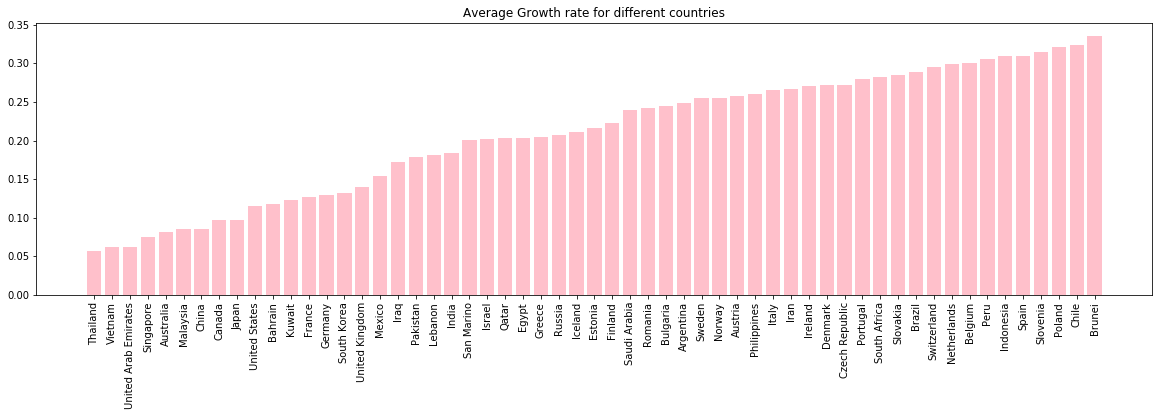

In [10]:
# Plot a bar-chart with growth-rate
plt.figure(figsize=(20,5))
plt.bar(df[0], df[1], width=0.8, color='pink')

plt.title('Average Growth rate for different countries')
plt.xticks(rotation = 90)
plt.show()

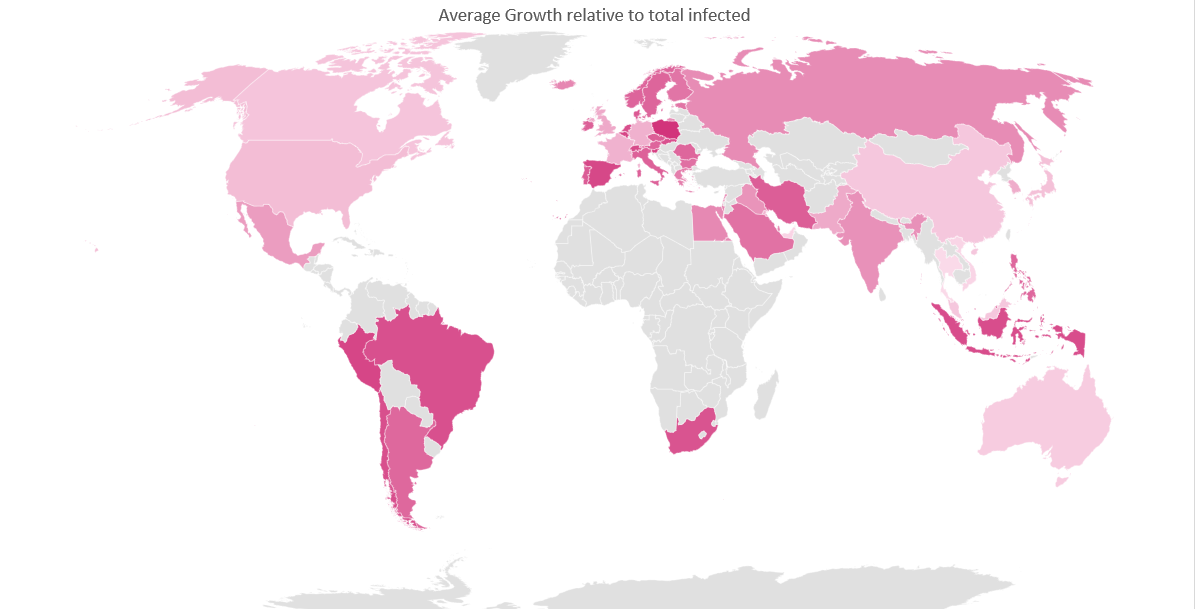

C:\Users\_Vinc\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
C:\Users\_Vinc\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


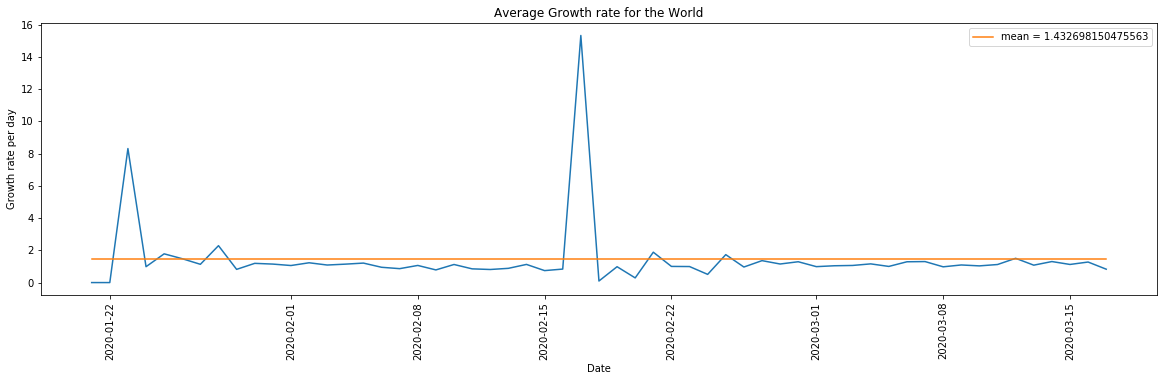

In [11]:
# plot the development of the growtrate for the world:

plt.figure(figsize=(20,5))
plt.plot(growt_rate(full_set, 'World')['date'], growt_rate(full_set, 'World')['GR'])
ymean = [growt_rate(full_set, 'World')['GR'].mean() for date in range(len(growt_rate(full_set, 'World')['date']))]
plt.plot(growt_rate(full_set, 'World')['date'], ymean, label='mean = {}'.format(ymean[0]))

plt.ylabel("Growth rate per day")
plt.xlabel('Date')
plt.title('Average Growth rate for the World')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

C:\Users\_Vinc\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':


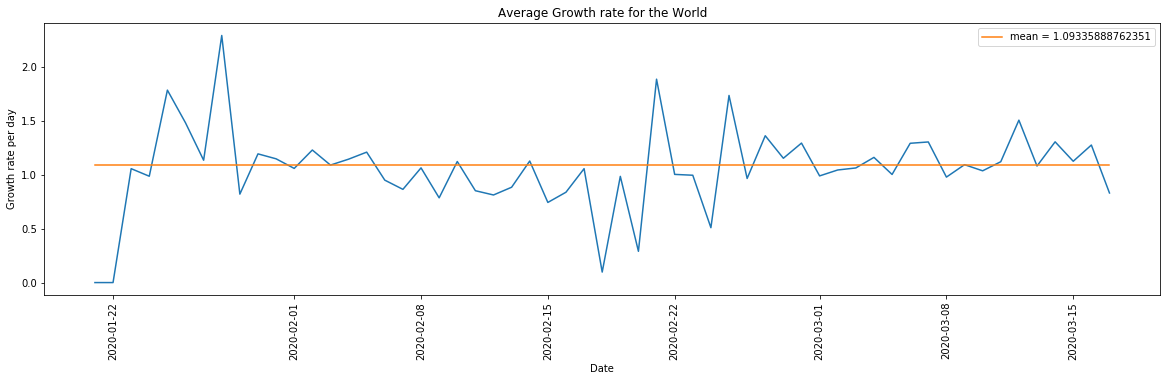

In [12]:
# Now without the exponential growth outliers (x8 in the beginning, x15 when spread to the rest of the world)
growt_rate(full_set, 'World')

plt.figure(figsize=(20,5))
ygr = [x if x < 4 else sts.mean([x for x in growt_rate(full_set, 'World')['GR'] if x <4]) for x in growt_rate(full_set, 'World')['GR']]
plt.plot(growt_rate(full_set, 'World')['date'], ygr)
ymean = [sts.mean(ygr[2:]) for date in range(len(growt_rate(full_set, 'World')['date']))]
plt.plot(growt_rate(full_set, 'World')['date'], ymean, label='mean = {}'.format(ymean[0]))

plt.ylabel("Growth rate per day")
plt.xlabel('Date')
plt.title('Average Growth rate for the World')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

# Plot the total cases in the world
We plot the cases that have more then 50 infections in total

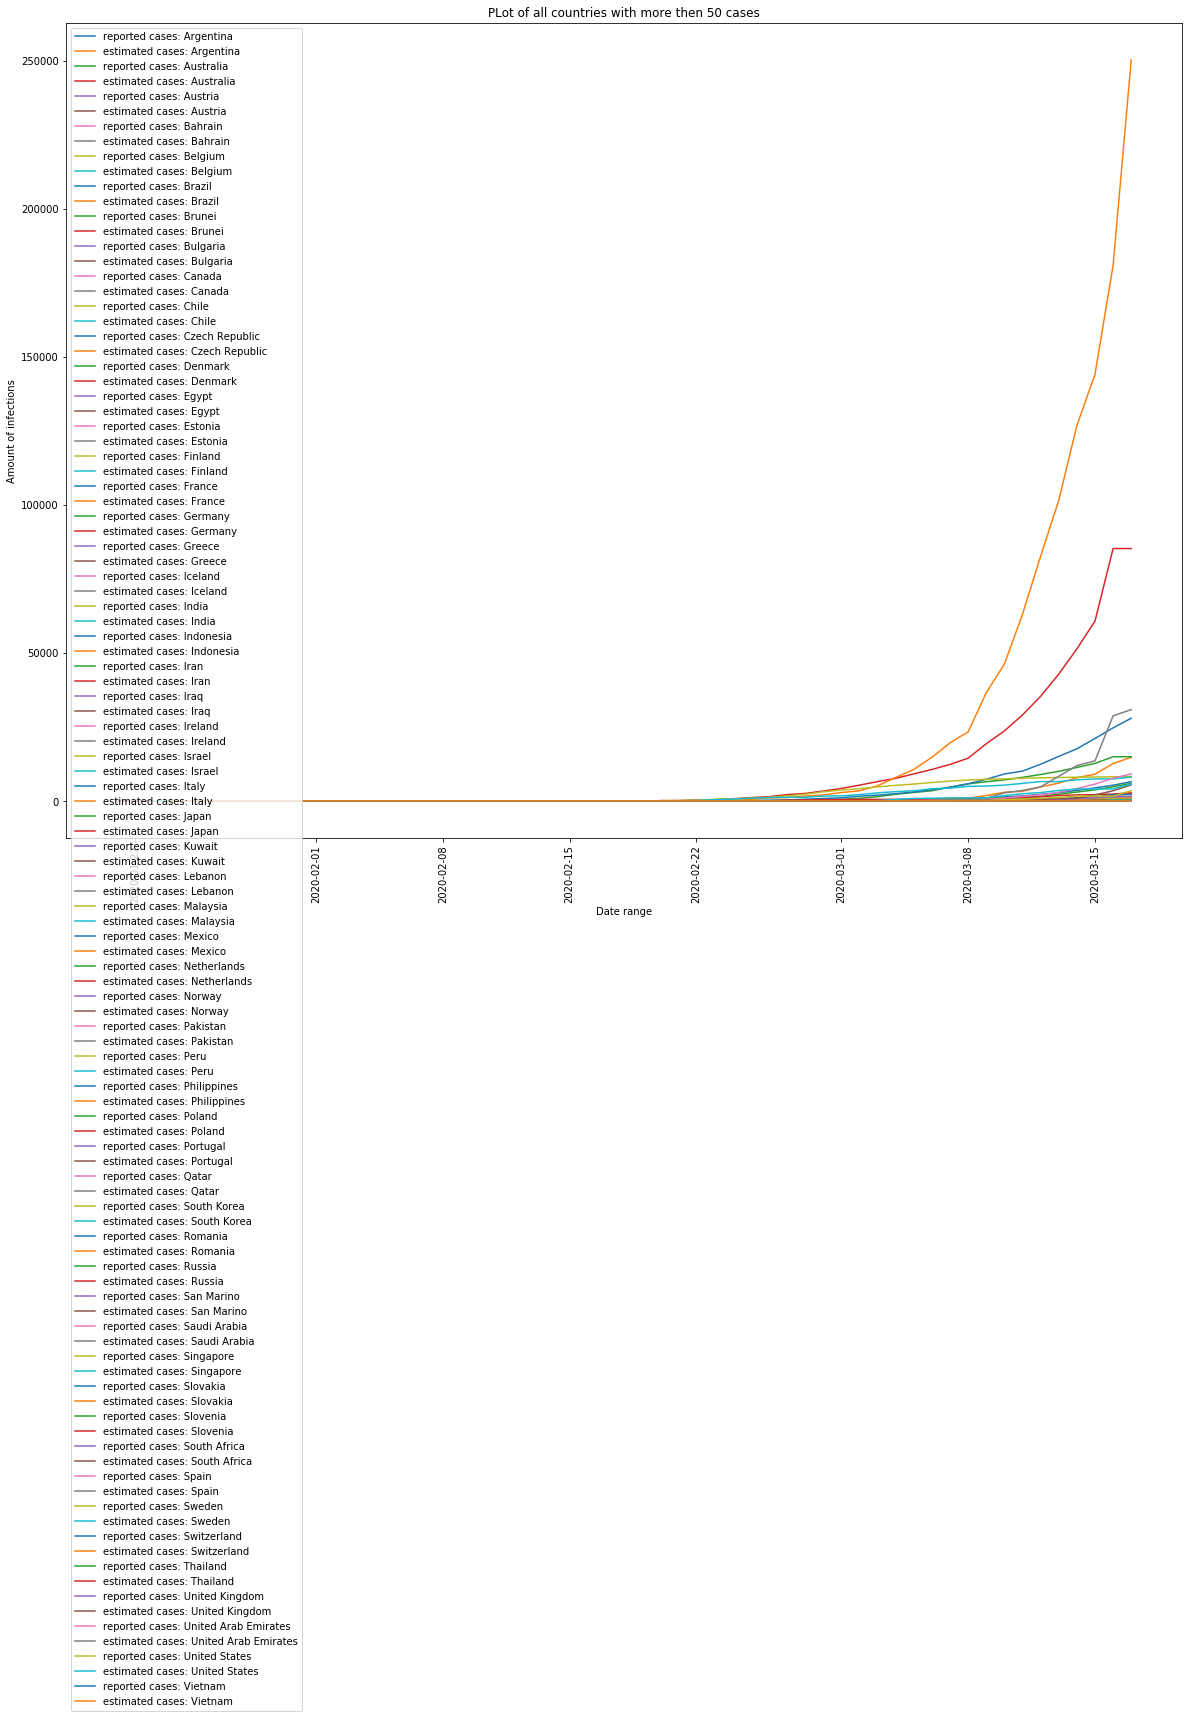

In [13]:
# plot dutch cases against Italian cases
more_then_c_list.remove('China')
plot_total_cases(more_then_c_list, 'PLot of all countries with more then 50 cases')

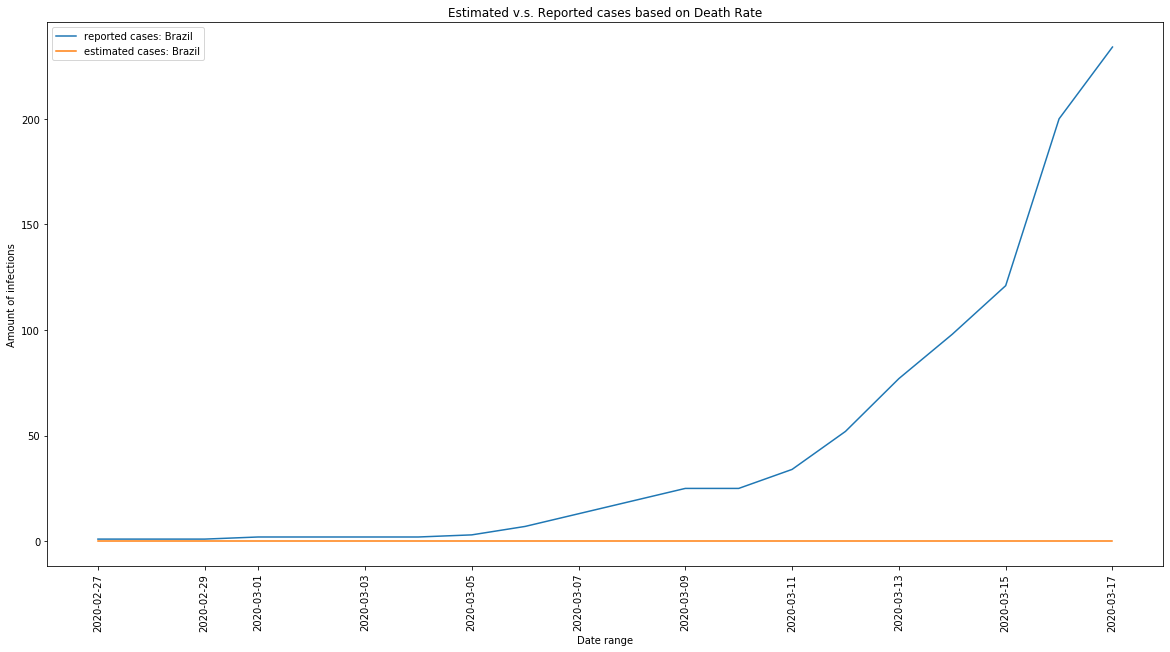

In [14]:
# plot dutch cases against Italian cases
country_list = ['Brazil']
plot_total_cases(country_list, 'Estimated v.s. Reported cases based on Death Rate', 10)

In [15]:
#lets make it more interactive with plotly
import plotly.graph_objects as go
traces_list = []
for item in more_then_c_list:
    x = full_set.loc[full_set['location'] == item]['date']

    trace = go.Scatter(x=x,
            y=full_set.loc[full_set['location'] == item]['total_cases'],
            name = item,
            )
    traces_list.append(trace)

Layout = go.Layout(xaxis=dict(showgrid=True, zeroline=True, showticklabels=True),
                   yaxis=dict(showgrid=True, zeroline=True, showticklabels=True),
                   xaxis_title="Days since outbreak",
                   yaxis_title="Amount of infected",
                    )

fig = go.Figure(data=traces_list, layout=Layout)
fig

# Lets look at new cases only
look at how the new cases are evolving over time, is there a logistic relation?

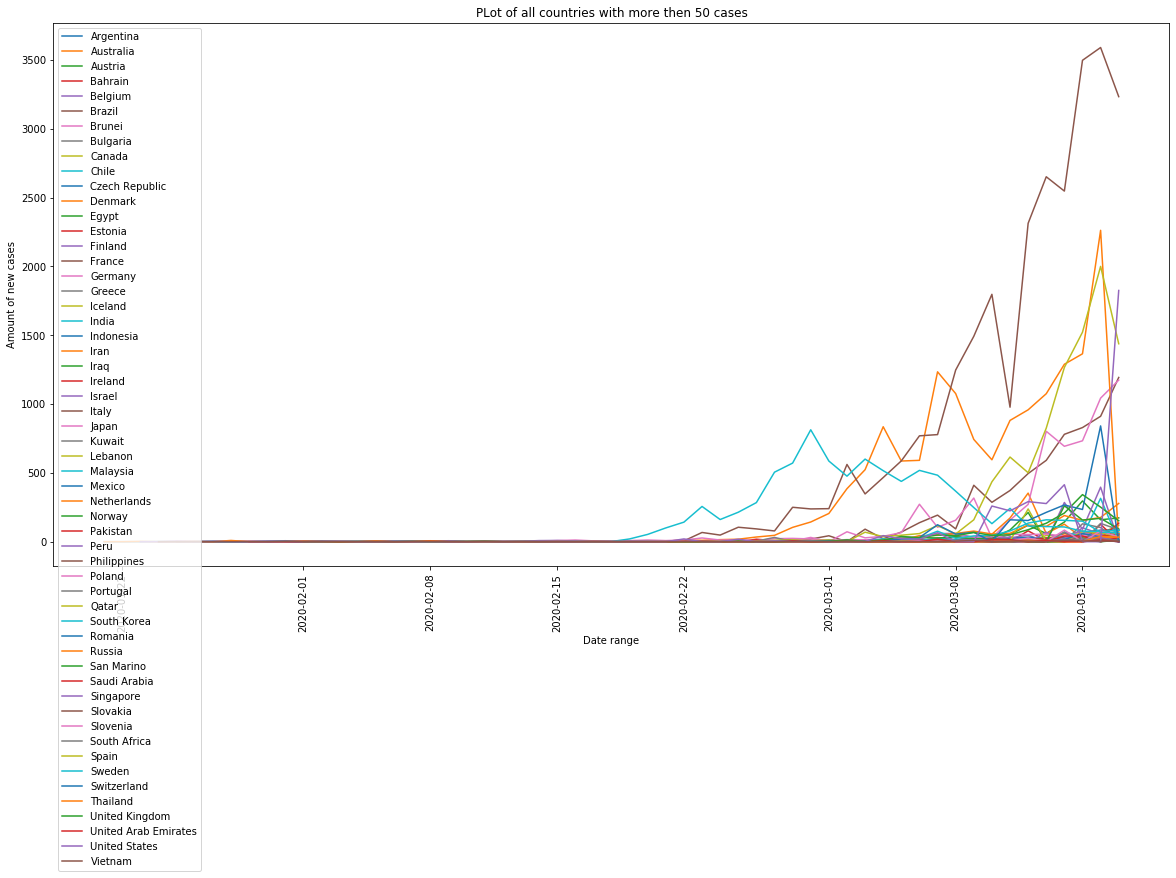

In [16]:
plot_new_cases(more_then_c_list, 'PLot of all countries with more then 50 cases')

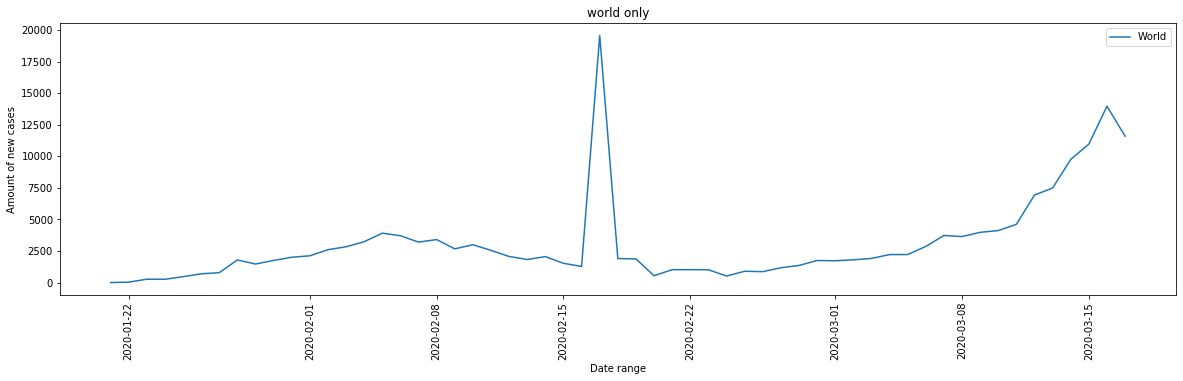

In [17]:
plot_new_cases(['World'], 'world only', height=5)

# look at Deaths per country
analysis on the amount of deaths per country

In [18]:
#First define a list with countries with reported deaths
c_with_deaths = list(set(full_set.loc[full_set['total_deaths'] > 1]['location']))
c_with_deaths.remove('International')
c_with_deaths.remove('World')
#c_with_deaths.remove('China')

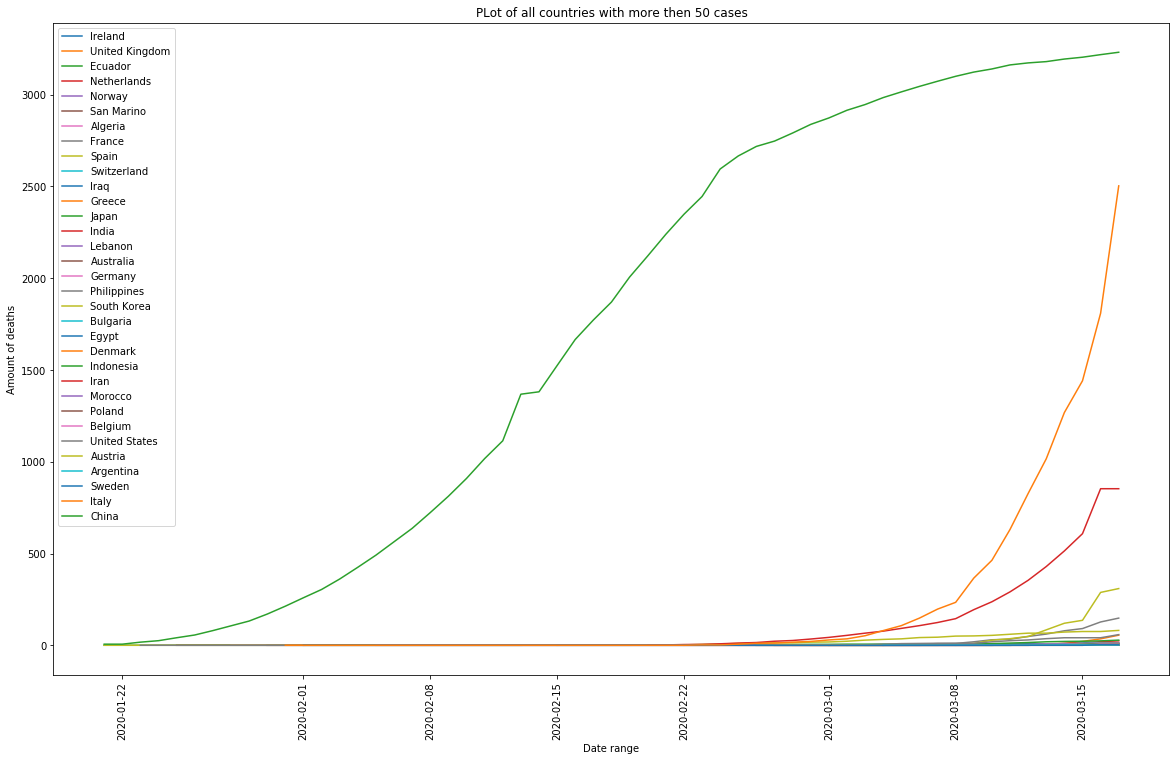

In [19]:
plot_death_cases(c_with_deaths, 'PLot of all countries with more then 50 cases', height = 12)

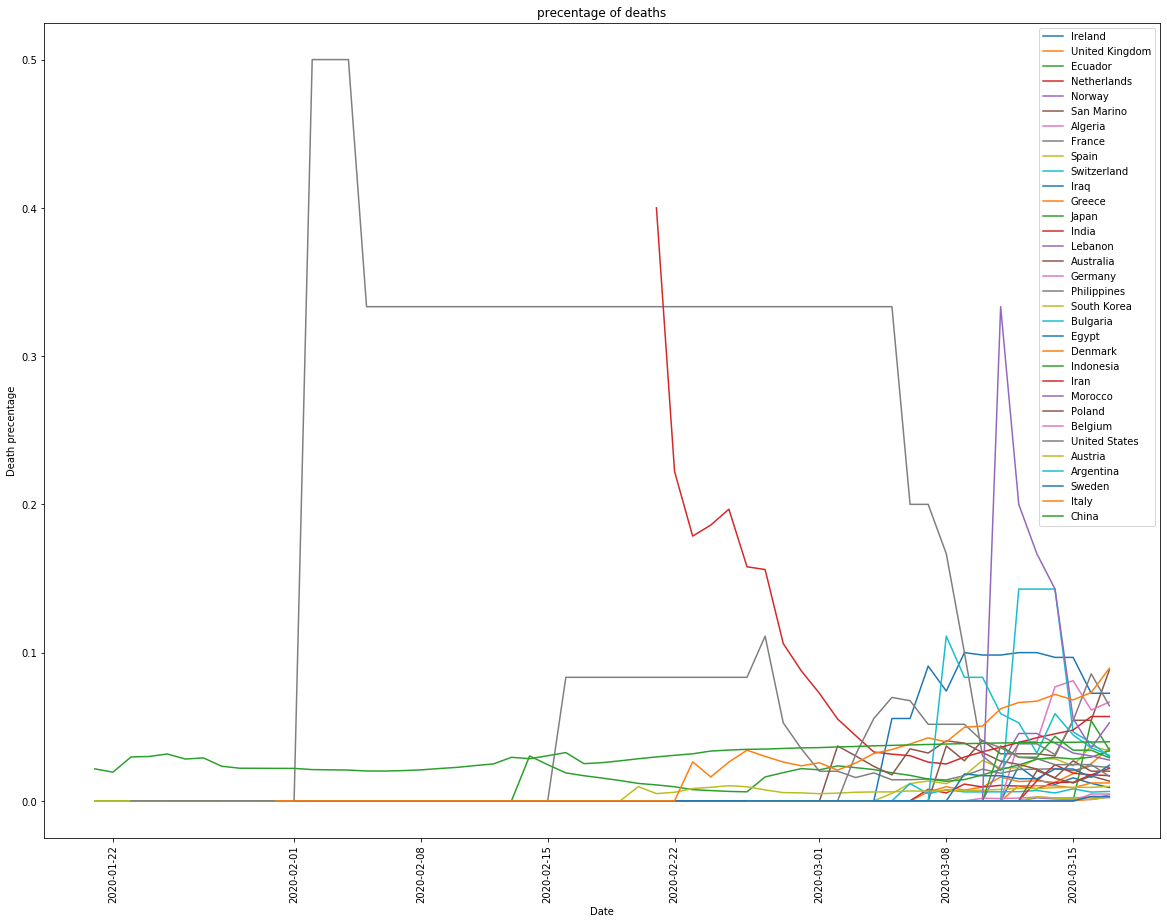

In [20]:
# deaths compared to infected (percentage)
plt.figure(figsize=(20,15))
stats = []
for country in c_with_deaths:
    plt.plot(death_rate(full_set, country)['date'], death_rate(full_set, country)['DR'], label=country)
    current =  death_rate(full_set, country)['DR'][-1:].values[0]
    mean_d = death_rate(full_set, country)['DR'].mean()
    median_d = death_rate(full_set, country)['DR'].median()
    max_d = death_rate(full_set, country)['DR'].max()
    min_d = death_rate(full_set, country)['DR'].min()
    std_d = death_rate(full_set, country)['DR'].std()
    stats.append([country, current, mean_d, max_d, min_d, std_d])
plt.ylabel("Death precentage")
plt.xlabel('Date')
plt.title('precentage of deaths')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

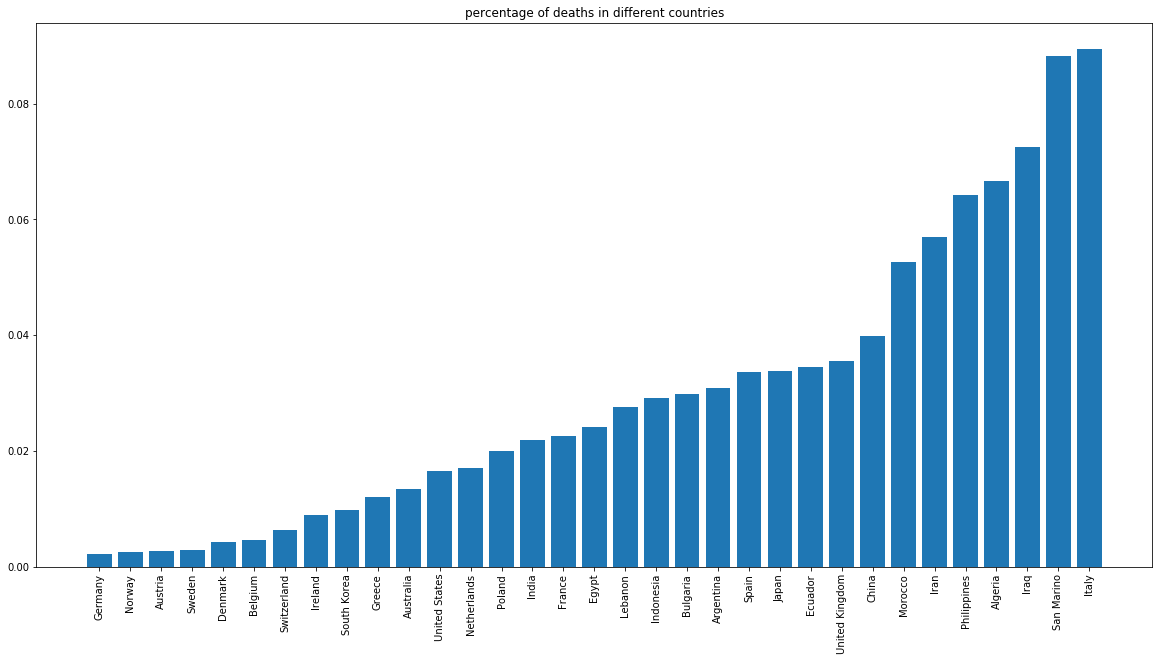

In [21]:
# Plot a Bar chart with the death rates
df = pd.DataFrame.from_records(stats)
#df.to_csv('test.csv')   #write to csv for further processing of the visualization.
df = df.sort_values(1)

# Plot a bar-chart with growth-rate
plt.figure(figsize=(20,10))
plt.bar(df[0], df[1], width=0.8)

plt.title('percentage of deaths in different countries')
plt.xticks(rotation = 90)
plt.show()

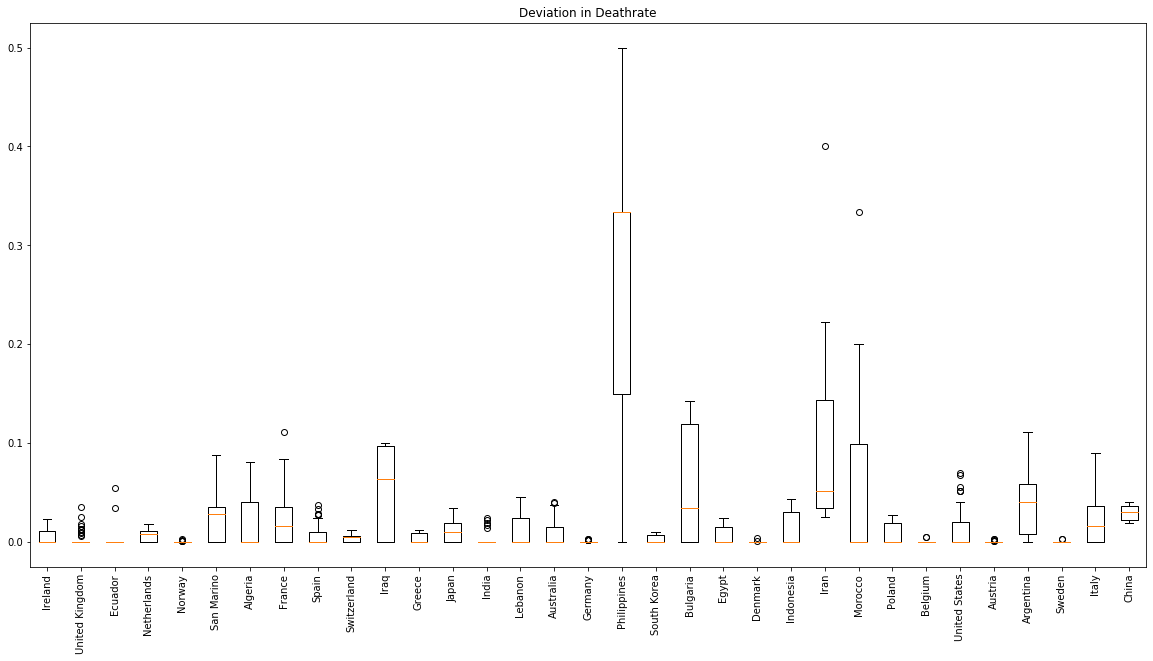

In [22]:
#fig = plt.figure(figsize=(20,10))
data = []
for country in c_with_deaths:
    data.append(death_rate(full_set, country)['DR'])
fig, ax1 = plt.subplots(figsize=(20, 10))
ax1.boxplot(data)
bp = ax1.set_xticklabels(c_with_deaths, rotation=90)
plt.title('Deviation in Deathrate')
plt.show()

# Forecast 
Done with a simple sigmoid function-linefit

In [53]:
from sklearn import linear_model
import time
import datetime
import pylab as plt
date_format = "%Y-%m-%d"

#parameters to define
item = 'Netherlands'
start = 0
x_shift = 13
today = 2994
halfwaypoint = 4000


# Return a dataFrame for a given country
country = item
pre_df = []
for date in all_dates:
    try:
        pre_df.append([date, country, 
                       date_dict[date][country]['infected'], 
                        date_dict[date][country]['deaths'], 
                         date_dict[date][country]['recovered']])
    except:
        pass
country_df = pd.DataFrame(pre_df, columns=['date','country', 'infected', 'deaths', 'recovered'])
country_df['delta_recover'] = [0]+[country_df['recovered'][x+1] - country_df['recovered'][x] for x in range(len(country_df['recovered'])-1)]
country_df['date'] = pd.to_datetime(country_df['date'])
country_df


def sigmoid(x):
    return ((1 / (1 + np.exp(-0.27*x + 10)))) * 2 * halfwaypoint

mySamples = []
mySigmoid = []
shift = 500
# 
y1 = plt.linspace(-shift+shift,40)


xd = country_df['date']
xd = [datetime.datetime.strptime(str(date)[:-9], date_format) for date in xd]
x = [(date-xd[0]).days for date in xd]

y = country_df['infected']

x = np.array(x).reshape(-1, 1)
y = np.array(y)

# and plot the result
plt.figure(1, figsize=(20, 10))

#plot the data
plt.scatter(x, y, color='black', label='from data')

#plot estimations
plt.plot(y1-x_shift, sigmoid(y1), 'b', label='predicted Sigmoid')
pred_list = [int(x[-1])+1, int(x[-1])+2, int(x[-1])+3]
f_date = [(xd[-1] + datetime.timedelta(i)).__format__('%m-%d-%Y') for i in range(1,4)]
y_predlist = [sigmoid(x+x_shift) for x in pred_list]
plt.scatter(pred_list, y_predlist, color='red', label='forecast')
plt.scatter(int(x[-1])+1, today, color='green')

plt.title('Estimate function for infections')
plt.legend()


print("based on data we predict:")
print(f_date[0], '| amount of cases:', y_predlist[0], 'Known: {}'.format(today), 'Accuracy: {}'.format(y_predlist[0]/today))
print(f_date[1], '| amount of cases:', y_predlist[1])
print(f_date[2], '| amount of cases:', y_predlist[2])
print('')
#print("R2 is :", sum([math.exp(y[i] - y_pred1[i]) for i in range(len(y))]))
plt.show()

based on data we predict:
03-20-2020 | amount of cases: 2926.915271913597 Known: 2994 Accuracy: 0.9775936111935861
03-21-2020 | amount of cases: 3443.630208486169
03-22-2020 | amount of cases: 3980.0001666650005



## NO LONGER USED ##

based on data we predict:
03-18-2020 | amount of cases: 2151.531370959961 Known: 2051 Accuracy: 1.0490157830131452
03-19-2020 | amount of cases: 2654.497822654669
03-20-2020 | amount of cases: 3210.4987191003834



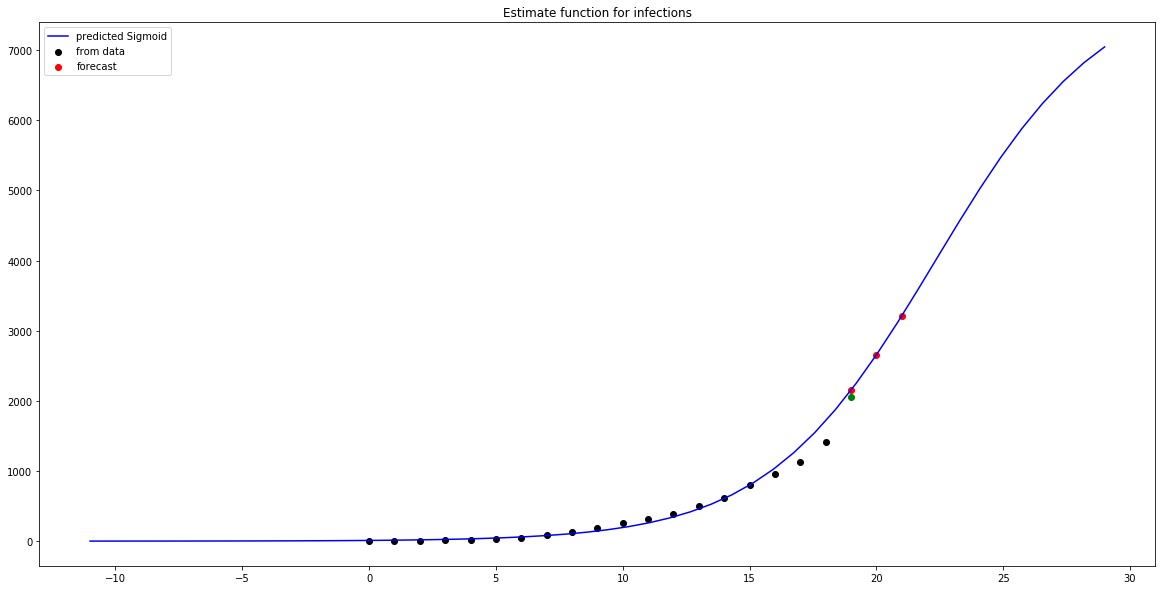

In [23]:
from sklearn import linear_model
import time
import datetime
import pylab as plt
date_format = "%Y-%m-%d"

#parameters to define
item = 'Netherlands'
start = 0
x_shift = 11
today = 2051
halfwaypoint = 4000


# Return a dataFrame for a given country
country = item
pre_df = []
for date in all_dates:
    try:
        pre_df.append([date, country, 
                       date_dict[date][country]['infected'], 
                        date_dict[date][country]['deaths'], 
                         date_dict[date][country]['recovered']])
    except:
        pass
country_df = pd.DataFrame(pre_df, columns=['date','country', 'infected', 'deaths', 'recovered'])
country_df['delta_recover'] = [0]+[country_df['recovered'][x+1] - country_df['recovered'][x] for x in range(len(country_df['recovered'])-1)]
country_df['date'] = pd.to_datetime(country_df['date'])
country_df


def sigmoid(x):
    return ((1 / (1 + np.exp(-0.30*x + 10)))) * 2 * halfwaypoint

mySamples = []
mySigmoid = []
shift = 500
# 
y1 = plt.linspace(-shift+shift,40)


xd = full_set.loc[full_set['location']== item]['date'][start:]
xd = [datetime.datetime.strptime(str(date)[:-9], date_format) for date in xd]
x = [(date-xd[0]).days for date in xd]

y = full_set.loc[full_set['location']== item]['total_cases'][start:]

x = np.array(x).reshape(-1, 1)
y = np.array(y)

# and plot the result
plt.figure(1, figsize=(20, 10))

#plot the data
plt.scatter(x, y, color='black', label='from data')

#plot estimations
plt.plot(y1-x_shift, sigmoid(y1), 'b', label='predicted Sigmoid')
pred_list = [int(x[-1])+1, int(x[-1])+2, int(x[-1])+3]
f_date = [(xd[-1] + datetime.timedelta(i)).__format__('%m-%d-%Y') for i in range(1,4)]
y_predlist = [sigmoid(x+x_shift) for x in pred_list]
plt.scatter(pred_list, y_predlist, color='red', label='forecast')
plt.scatter(int(x[-1])+1, today, color='green')

plt.title('Estimate function for infections')
plt.legend()


print("based on data we predict:")
print(f_date[0], '| amount of cases:', y_predlist[0], 'Known: {}'.format(today), 'Accuracy: {}'.format(y_predlist[0]/today))
print(f_date[1], '| amount of cases:', y_predlist[1])
print(f_date[2], '| amount of cases:', y_predlist[2])
print('')
#print("R2 is :", sum([math.exp(y[i] - y_pred1[i]) for i in range(len(y))]))
plt.show()